### Determine the Proper Simulation Method

In order determine the probability of any individual hand, we must run multiple simulations using the game class being specified. We must determine the follow:

* simulations to be done
* sample means that must be used to 

Factors in the decision making include:

* spread of probability for various simulation numbers
* sample mean proximity to largest probability

#### Simulation

The simulation will performed with one player cards set ( Ace of Hearts and Ace of Clubs). The game class will randomly fill the position of the all the common card and other players (10 players total). Then the win/loss method will determine if the first player had the best hand compare to the other players. 

The below number of simulations will be done and percent of wins will be calculated in each run:
* 10
* 25
* 50
* 100
* 250
* 500
* 1000

25 of each number simulations will be done and the distributions and key statistic will be analyzed as well as the time to complete simulations.



In [1]:
from texas import TexasHoldThem, deck
from cards import high_card_order, hand_rank, suits
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
import itertools
from sqlconnection import DBManager
import time
import numpy as np
from scipy import stats

In [2]:
numbers_of_simulations = [10, 25, 50, 100, 250, 500, 1000, 2500, 5000, 10000]
distributions = []
times = []
hand = [(0, 14), (1, 14)]
for numbers in numbers_of_simulations:
    sim = []
    tim = []
    for i in range(25):
        tic = time.perf_counter()
        simulation = sum([TexasHoldThem().win_loss(hand) for i in range(numbers)])/numbers
        tim.append(time.perf_counter()- tic)
        sim.append(simulation)
    times.append(sum(tim)/25)
    distributions.append(sim)
    

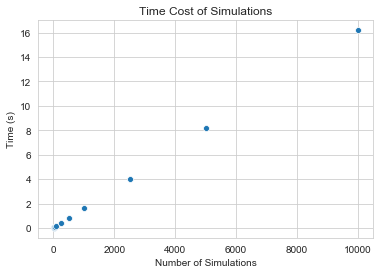

In [3]:
sns.scatterplot(x= numbers_of_simulations, y = times).set_title('Time Cost of Simulations'); 
plt.xlabel('Number of Simulations')
plt.ylabel('Time (s)')
plt.show()

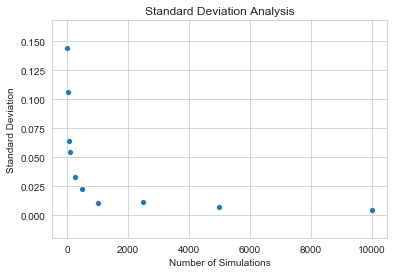

In [4]:
sns.scatterplot(x = numbers_of_simulations, y = [np.std(dist) for dist in distributions]).set_title('Standard Deviation Analysis')
plt.xlabel('Number of Simulations')
plt.ylabel('Standard Deviation')
plt.show()

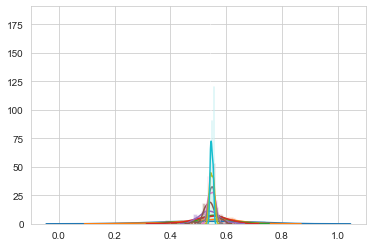

In [5]:
for dist in distributions:
    sns.distplot(dist, bins = 10)

#### Determine the amount sample you need


In [14]:
samples = [10, 25, 50]
distributions = []
times = []
hand = [(0, 14), (1, 14)]
numbers =  500
for sample in samples:
    sim = []
    tic = time.perf_counter()
    for i in range(sample):
        simulation = sum([TexasHoldThem().win_loss(hand) for i in range(numbers)])/numbers
        
        sim.append(simulation)
    times.append(time.perf_counter()- tic)
    distributions.append(sim)

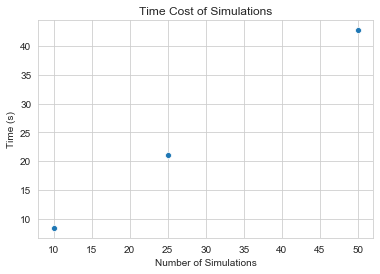

In [15]:
sns.scatterplot(x= samples, y = times).set_title('Time Cost of Simulations'); 
plt.xlabel('Number of Simulations')
plt.ylabel('Time (s)')
plt.show()

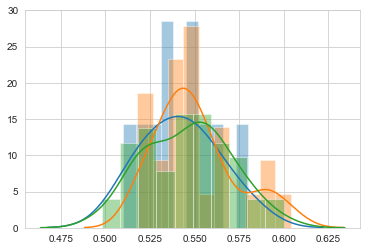

In [16]:
for dist in distributions:
    sns.distplot(dist, bins = 10)